## Get all imports

In [1]:
import math
import numpy as np
import pandas as pd
from collections import Counter
from PyImpetus import PPIMBC
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import time

## Load data

In [2]:
# Load the data into a dataframe
df = pd.read_csv("ionosphere.data", header=None)
# Pre-process the data
df[34] = df[34].str.replace("g", '1').replace("b", '0')
# Lets check it out
display(df.head())
# Split the data into input features and target variable
data, Y = df.drop([34], axis=1), df[34].values
# Lets check out the shape of our data
print("Data shape: ", data.shape, "Target Variable shape: ", Y.shape)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


Data shape:  (351, 34) Target Variable shape:  (351,)


## Modelling with Decision Tree without PyImpetus

In [3]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]
    
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

Score:  0.9436619718309859
Score:  0.9142857142857143
Score:  0.8285714285714286
Score:  0.8428571428571429
Score:  0.8714285714285714


Average Accuracy:  0.8801609657947687


Total Time Required (in seconds):  0.03653097152709961


## Modelling with Decision Tree (fast but less robust feature subset selection)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

Markov Blanket:  [0, 21, 6, 4, 3, 2, 26, 14, 16, 7, 8, 28, 12, 24, 10]
Feature importance:  [13.862943611198906, 12.253505698764807, 11.223886281583647, 10.918504632032466, 9.614448369149548, 9.3856067967207, 9.16246324540649, 8.733044896275834, 6.019879594506852, 6.019879594506852, 5.109414274682476, 3.815485593252747, 3.720557275404062, 3.446363007454386, 3.446363007454386]


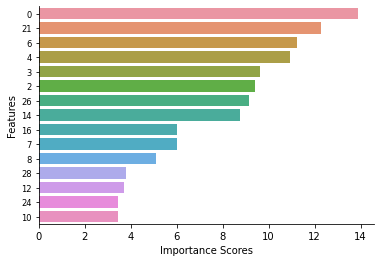

Score:  0.9577464788732394


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

Markov Blanket:  [26, 2, 0, 4, 21, 17, 14, 8, 7, 20, 6, 3, 22, 13, 30, 18, 5, 24, 12]
Feature importance:  [13.862943611198906, 13.862943611198906, 13.16979643063896, 13.16979643063896, 11.560358518204861, 11.560358518204861, 8.733044896275834, 8.733044896275834, 8.530224817933536, 8.530224817933536, 8.13609586361171, 7.762624659178842, 7.241537959434772, 6.452596513377882, 6.3049486526681005, 5.483634127146055, 5.483634127146055, 3.720557275404062, 3.1044876919713547]


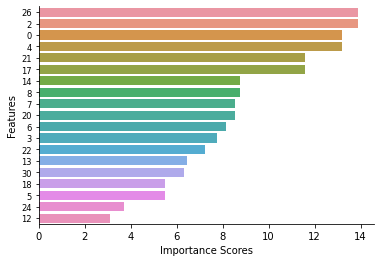

Score:  0.9857142857142858


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

Markov Blanket:  [20, 0, 2, 4, 8, 7, 30, 6, 18, 10]
Feature importance:  [13.862943611198906, 13.862943611198906, 12.764331322530797, 11.917033462143593, 11.560358518204861, 10.644067786330705, 8.942962685370782, 6.452596513377882, 4.644238322891096, 3.627422228640497]


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


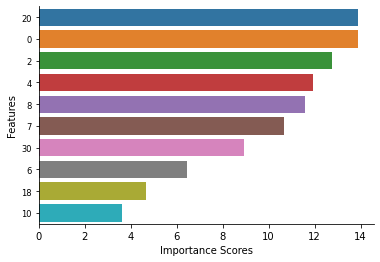

Score:  0.8857142857142857


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

Markov Blanket:  [0, 2, 4, 26, 21, 30, 22, 17, 13, 28, 7, 6, 20, 8, 32]
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.16979643063896, 12.253505698764807, 10.918504632032466, 9.3856067967207, 7.762624659178842, 6.757157481717635, 6.757157481717635, 6.452596513377882, 6.452596513377882, 4.424910053209942, 4.213961286420002, 3.187497697678543]


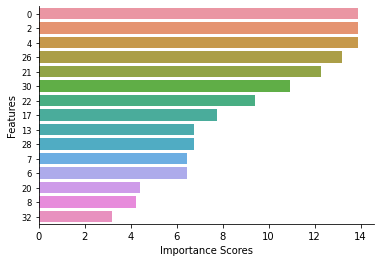

Score:  0.9


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

Markov Blanket:  [0, 2, 7, 6, 4, 30, 17, 18, 8, 10, 20, 28]
Feature importance:  [13.862943611198906, 13.862943611198906, 13.16979643063896, 12.253505698764807, 11.560358518204861, 11.223886281583647, 9.614448369149548, 6.757157481717635, 6.160839271147856, 4.757075260819435, 4.644238322891096, 4.11144241566066]


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


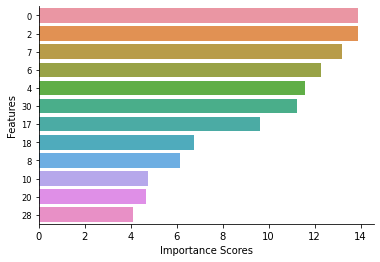

Score:  0.9142857142857143


Average Accuracy:  0.928692152917505


Total Time Required (in seconds):  9.881650447845459


In [4]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    # NOTE: To achieve fast selection, set cv=0 for disabling the use of any internal cross-validation
    model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), cv=0, num_simul=20, simul_type=0, simul_size=0.2, sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.05)
    # Fit this above object on the train part and transform the train dataset into selected feature subset
    # NOTE: x_train has to be a dataframe and y_train has to be a numpy array
    x_train = model.fit_transform(x_train, y_train)
    # Transform the test set as well
    # NOTE: x_test has to be a dataframe
    x_test = model.transform(x_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    # NOTE: You can use these scores ina feature selection ensemble
    print("Feature importance: ", model.feat_imp_scores)
    # Plot the feature importance scores
    model.feature_importance()
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

# Final Results (Accuracy is used so higher is better)

### Final Accuracy using all features: 0.8801 (0.0073 seconds)
### Final Accuracy using PyImpetus recommended features: 0.9286 (1.976 seconds)